In [62]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [63]:
img = cv2.imread('data/Picture1.jpg', 0)

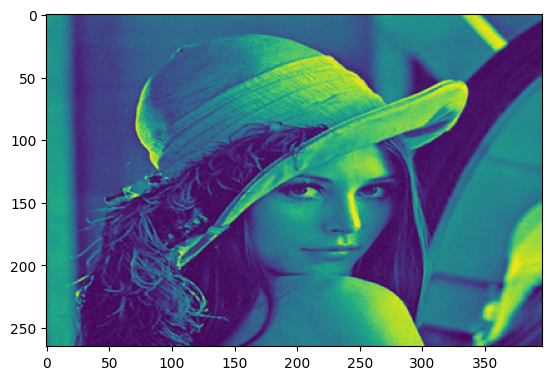

In [64]:
plt.imshow(img)

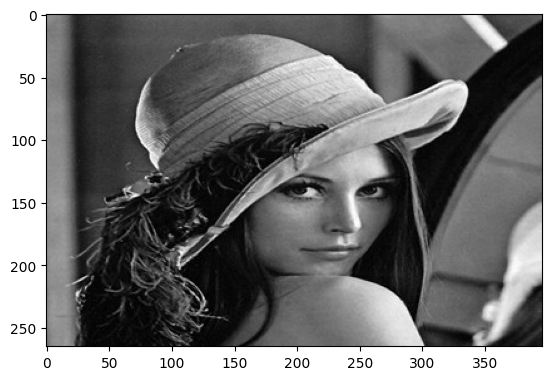

In [65]:
new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(new_img)

In [66]:
grey_img = cv2.cvtColor(new_img, cv2.COLOR_RGB2GRAY)

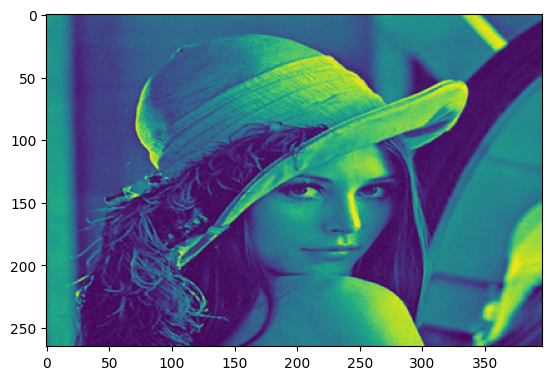

In [67]:
plt.imshow(grey_img)

In [68]:
bin_img = cv2.threshold(grey_img, 127, 255, cv2.THRESH_BINARY)[1]

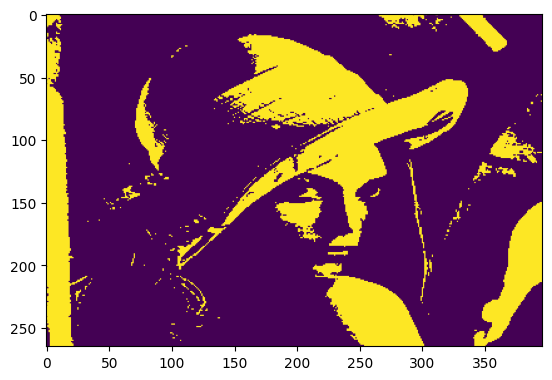

In [69]:
plt.imshow(bin_img)

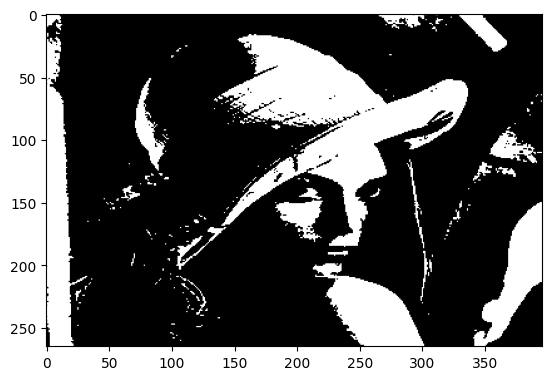

In [70]:
plt.imshow(bin_img, cmap='gray')

Image dimensions: 265x396
Total pixels: 104940
Black pixels: 79912
Ratio of black pixels: 0.762


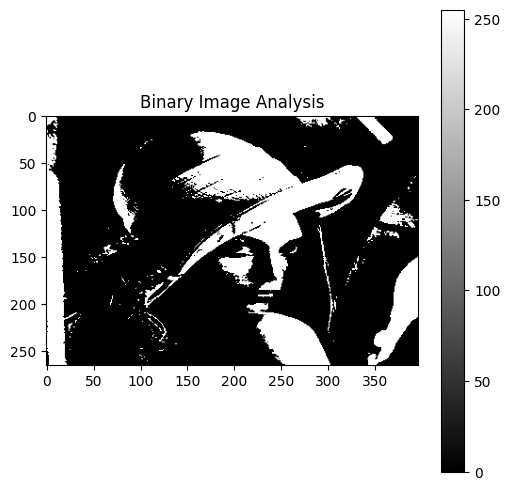

In [71]:
# Get dimensions
height, width = bin_img.shape
total_pixels = height * width

# Counting black pixels
black_pixels = np.sum(bin_img == 0)

# Calculating ratio
black_ratio = black_pixels / total_pixels

print(f"Image dimensions: {height}x{width}")
print(f"Total pixels: {total_pixels}")
print(f"Black pixels: {black_pixels}")
print(f"Ratio of black pixels: {black_ratio:.3f}")

plt.figure(figsize=(6,6))
plt.imshow(bin_img, cmap='gray')
plt.title(f"Binary Image Analysis")
plt.colorbar()
plt.show()

## Task 2

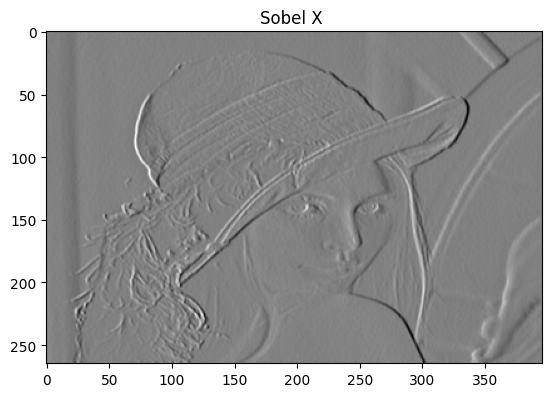

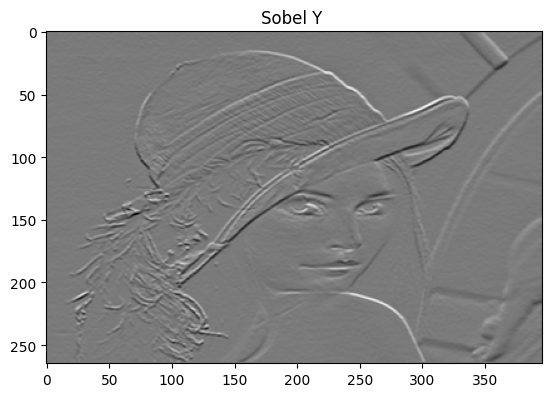

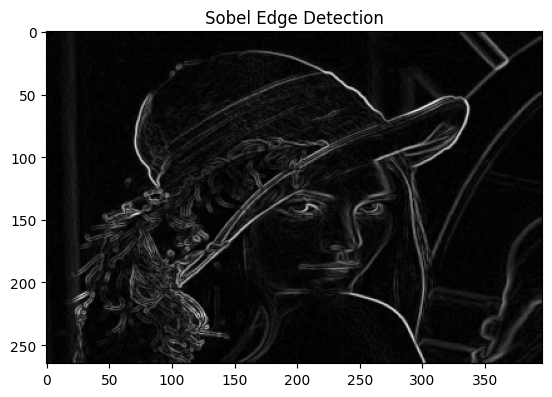

In [72]:
sobel_x = cv2.Sobel(grey_img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel( grey_img, cv2.CV_64F, 0, 1, ksize=3)
sobel_mag = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_mag = cv2.normalize(sobel_mag, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)


plt.imshow(sobel_x, cmap='gray')
plt.title("Sobel X ")
plt.show()


plt.imshow(sobel_y, cmap='gray')
plt.title("Sobel Y ")
plt.show()


# Display result
plt.imshow(sobel_mag, cmap='gray')
plt.title("Sobel Edge Detection")
plt.show()

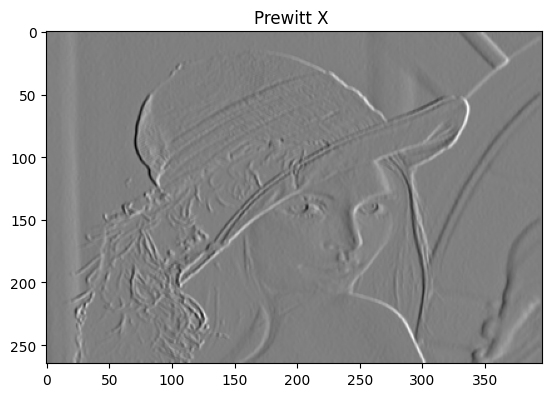

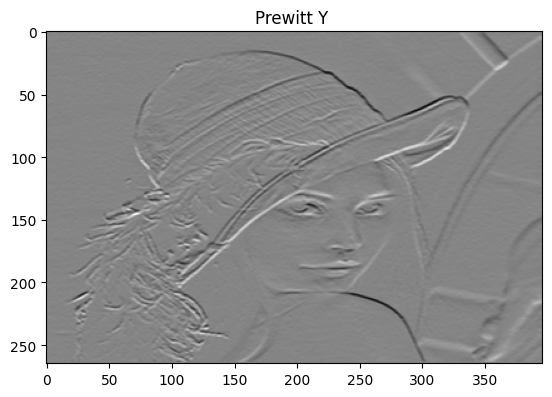

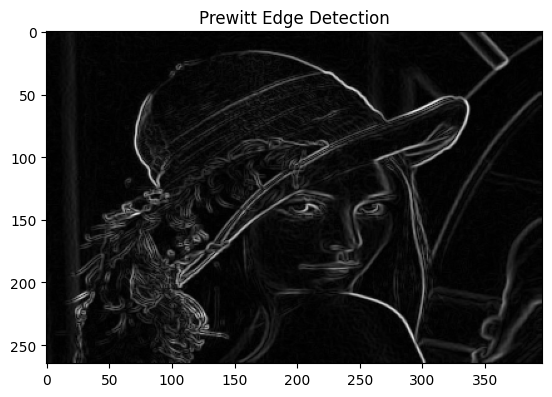

In [73]:
kernel_prewitt_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
kernel_prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_x = cv2.filter2D(grey_img, cv2.CV_32F, kernel_prewitt_x)
prewitt_y = cv2.filter2D(grey_img, cv2.CV_32F, kernel_prewitt_y)
prewitt_mag = np.sqrt(prewitt_x**2 + prewitt_y**2)
prewitt_mag = cv2.normalize(prewitt_mag, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)


plt.imshow(prewitt_x, cmap='gray')
plt.title("Prewitt X ")
plt.show()

plt.imshow(prewitt_y, cmap='gray')
plt.title("Prewitt Y ")
plt.show()

plt.imshow(prewitt_mag, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.show()



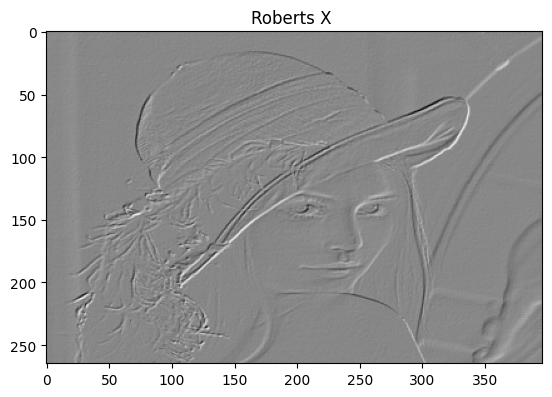

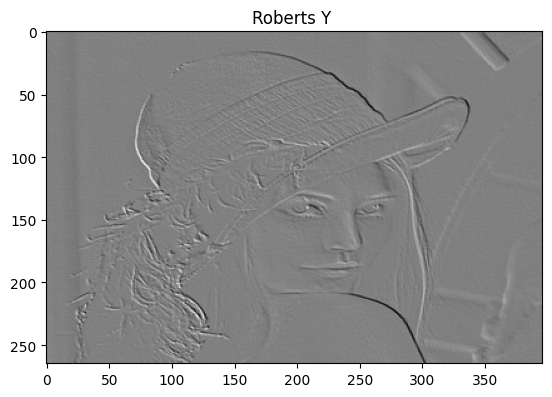

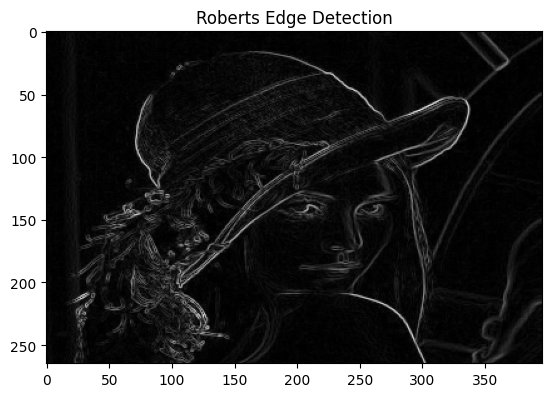

In [74]:
kernel_roberts_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
kernel_roberts_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)
roberts_x = cv2.filter2D(grey_img, cv2.CV_32F, kernel_roberts_x)
roberts_y = cv2.filter2D(grey_img, cv2.CV_32F, kernel_roberts_y)
roberts_mag = np.sqrt(roberts_x**2 + roberts_y**2)
roberts_mag = cv2.normalize(roberts_mag, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)


plt.imshow(roberts_x, cmap='gray')
plt.title("Roberts X ")
plt.show()


plt.imshow(roberts_y, cmap='gray')
plt.title("Roberts Y ")
plt.show()

plt.imshow(roberts_mag, cmap='gray')
plt.title("Roberts Edge Detection")
plt.show()

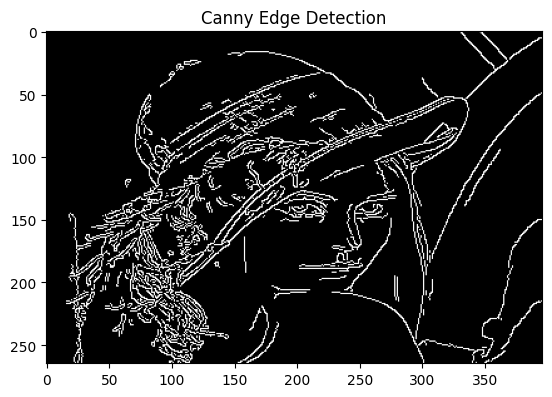

In [75]:
canny_edges = cv2.Canny(grey_img, 100, 200)

plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.show()


In [76]:
def display_images(images, titles, rows, cols):
    plt.figure(figsize=(15, 10))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

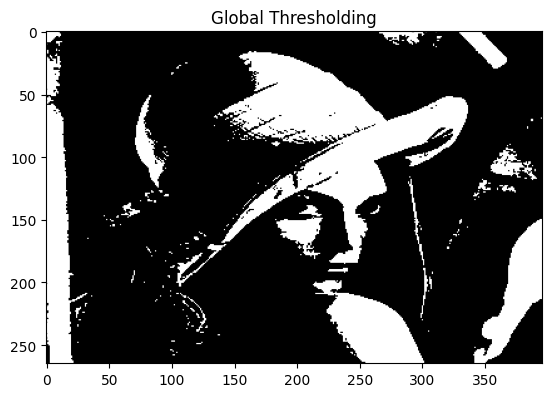

In [77]:
_, global_thresh = cv2.threshold(grey_img, 128, 255, cv2.THRESH_BINARY)

plt.imshow(global_thresh, cmap='gray')
plt.title("Global Thresholding")
plt.show()


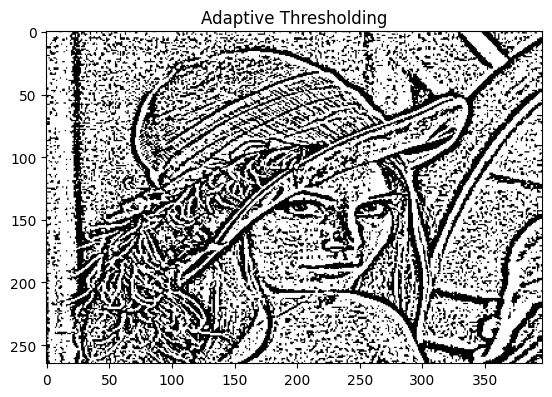

In [78]:
adaptive_thresh = cv2.adaptiveThreshold(grey_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Adaptive Thresholding")
plt.show()


In [79]:
canny_edges = cv2.Canny(grey_img, 100, 200)
contours, _ = cv2.findContours(canny_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
segmented_edges = cv2.cvtColor(grey_img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(segmented_edges, contours, -1, (0, 255, 0), 1)

array([[[137, 137, 137],
        [140, 140, 140],
        [141, 141, 141],
        ...,
        [ 92,  92,  92],
        [ 90,  90,  90],
        [ 88,  88,  88]],

       [[139, 139, 139],
        [142, 142, 142],
        [142, 142, 142],
        ...,
        [ 92,  92,  92],
        [ 93,  93,  93],
        [ 92,  92,  92]],

       [[139, 139, 139],
        [142, 142, 142],
        [142, 142, 142],
        ...,
        [ 91,  91,  91],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       ...,

       [[112, 112, 112],
        [115, 115, 115],
        [122, 122, 122],
        ...,
        [ 27,  27,  27],
        [ 28,  28,  28],
        [ 29,  29,  29]],

       [[108, 108, 108],
        [112, 112, 112],
        [120, 120, 120],
        ...,
        [ 25,  25,  25],
        [ 25,  25,  25],
        [ 26,  26,  26]],

       [[107, 107, 107],
        [106, 106, 106],
        [120, 120, 120],
        ...,
        [ 24,  24,  24],
        [ 23,  23,  23],
        [ 23,  23,  23]]

## Watershed Algo

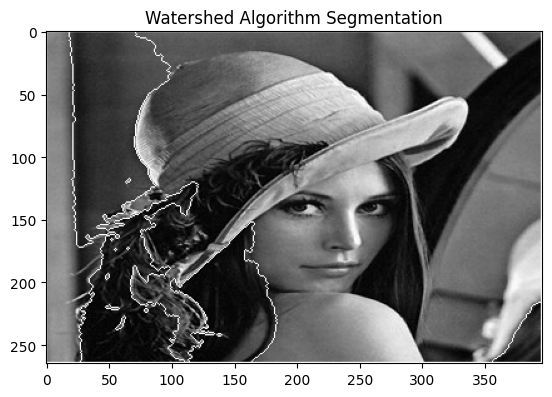

In [80]:
# Convert to grayscale and apply binary thresholding
_, binary = cv2.threshold(grey_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Distance transformation
dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(binary, sure_fg)

# Marker labeling
_, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels
markers = markers + 1

# Mark the unknown region with zero
markers[unknown == 255] = 0

# Apply Watershed Algorithm
markers = cv2.watershed(cv2.cvtColor(grey_img, cv2.COLOR_GRAY2BGR), markers)

# Mark boundaries
grey_img[markers == -1] = [255]

plt.imshow(grey_img, cmap='gray')
plt.title("Watershed Algorithm Segmentation")
plt.show()
